<a href="https://colab.research.google.com/github/susan6456/Decoding-emotional-through-sentiment-analysis-of-social-media-conversation-/blob/main/data_science_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🔰 ***Project: Decode Emotional Through Sentimental Analysis of Social Media Conversation***

***UPLOAD THE DATASET***

In [8]:
# Upload dataset file to Colab

from google.colab import files
uploaded = files.upload()

Saving training.50000.processed.noemoticon.csv to training.50000.processed.noemoticon (1).csv


***LOAD THE DATASET***

In [10]:
import pandas as pd

# Spec thuify the encoding when reading the CSV file
df = pd.read_csv('training.50000.processed.noemoticon.csv', encoding='latin-1')  # Try 'latin-1' or 'ISO-8859-1'

df.head()


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


***DATA EXPLORATION***

In [11]:
# Display basic dataset information
#show the first few rows of the dataset
df.head()

# shape of the dataset
print("Dataset Shape:", df.shape)

# column names
print("Dataset Columns:", df.columns)

# data types and non null values
df.info()

#summary statistics for numerical features
df.describe()


Dataset Shape: (179999, 6)
Dataset Columns: Index(['0', '1467810369', 'Mon Apr 06 22:19:45 PDT 2009', 'NO_QUERY',
       '_TheSpecialOne_',
       '@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179999 entries, 0 to 179998
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count   Dtype 
---  ------                                                                                                               --------------   ----- 
 0   0                                                                                                                    179999 non-null  int64 
 1   1467810369                                                                                                           179999 non-null  int64 
 2   Mon Apr 06 2

,0,1467810369
count,179999.0,1.799990e+05
mean,0.0,1.750723e+09
std,0.0,1.446545e+08
min,0.0,1.467811e+09
25%,0.0,1.677032e+09
50%,0.0,1.755602e+09
75%,0.0,1.836405e+09
max,0.0,1.966441e+09


from matplotlib import pyplot as plt
_df_0['0'].plot(kind='hist', bins=20, title='0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['1467810369'].plot(kind='hist', bins=20, title='1467810369')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='0', y='1467810369', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['0'].plot(kind='line', figsize=(8, 4), title='0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['1467810369'].plot(kind='line', figsize=(8, 4), title='1467810369')
plt.gca().spines[['top', 'right']].set_visible(False)

***CHECKING FOR MISSING VALUES AND DUPLICATES***

In [12]:
# check for missing values
print("missing values:", df.isnull().sum())

# check for duplicate rows
print("duplicate rows:", df.duplicated().sum())

missing values: 0                                                                                                                      0
1467810369                                                                                                             0
Mon Apr 06 22:19:45 PDT 2009                                                                                           0
NO_QUERY                                                                                                               0
_TheSpecialOne_                                                                                                        0
@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D    0
dtype: int64
duplicate rows: 0


***VISUALIZE A FEATURES***

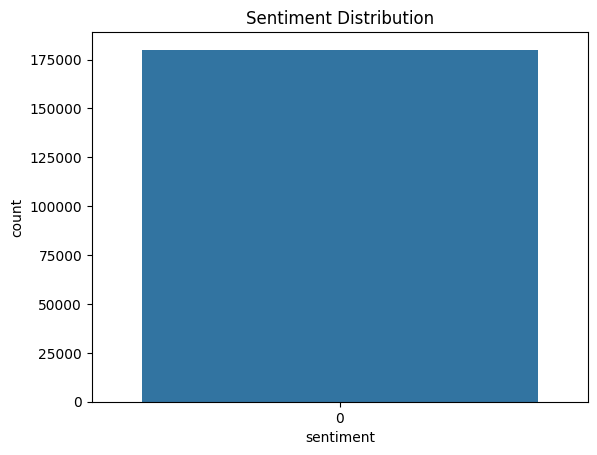

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns #Import seaborn and assign alias
import pandas as pd

# Specify the encoding when reading the CSV file
df = pd.read_csv('training.50000.processed.noemoticon.csv', encoding='latin-1', header=None)  # Try 'latin-1' or 'ISO-8859-1'

# Assign column names
df.columns = ["sentiment", "id", "date", "query", "user", "text"]

sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


***IDENTIFY TARGET AND FEATURES***

In [14]:
# Assuming 'df' is your DataFrame containing the data
X = df['text']
y = df['sentiment']

print(X.head())  # Shows example texts
print(y.head())  # Shows corresponding sentiment labels



0    @switchfoot http://twitpic.com/2y1zl - Awww, t...
1    is upset that he can't update his Facebook by ...
2    @Kenichan I dived many times for the ball. Man...
3      my whole body feels itchy and like its on fire 
4    @nationwideclass no, it's not behaving at all....
Name: text, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: sentiment, dtype: int64


***CONVERT CATEGORICAL COLUMNS TO NUMERICAL***

In [15]:
# identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print("categorical columns:", categorical_cols.tolist())

categorical columns: ['date', 'query', 'user', 'text']


***ONE HOT ENCODING***

In [16]:
# identify categorical columns
# categorical_cols = df.select_dtypes(include=['object']).columns
# print("categorical columns:", categorical_cols.tolist())

# Get dummies for the 'sentiment' column in your original DataFrame or a copy
df = pd.get_dummies(df, columns=["sentiment"], prefix="sentiment") # Applying get_dummies to the 'sentiment' column
#if you want to rename the newly created one-hot encoded columns, add the `prefix` argument
df.head()

,id,date,query,user,text,sentiment_0
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",True
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,True
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,True
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,True
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",True


from matplotlib import pyplot as plt
_df_5['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('user').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_8.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user')):
  _plot_series(series, series_name, i)
  fig.legend(title='user', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but no

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user'].value_counts()
    for x_label, grp in _df_14.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('user')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_15.groupby('user')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user')
_ = plt.ylabel('text')

/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='id', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['user'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='id', y='user', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='id', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

***FEATURE SCALING***

In [17]:
# Feature scaling is not needed for text data, but it can be used if you add numerical features.
# Here we will use TF-IDF Vectorization for text features.

from sklearn.preprocessing import MinMaxScaler

# Assuming your sentiment columns are named 'sentiment_0', 'sentiment_1', etc.
sentiment_columns = [col for col in df.columns if col.startswith('sentiment_')]

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Scale the sentiment columns
df[sentiment_columns] = scaler.fit_transform(df[sentiment_columns])

# Display the first few rows of the updated DataFrame
df.head()

,id,date,query,user,text,sentiment_0
0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0.0
1,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,0.0
2,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,0.0
3,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,0.0
4,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",0.0


from matplotlib import pyplot as plt
_df_19['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_20.groupby('date').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_21.groupby('user').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('text').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('user')):
  _plot_series(series, series_name, i)
  fig.legend(title='user', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['id']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'id'}, axis=1)
              .sort_values('id', ascending=True))
  xs = counted['id']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('id', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('text')):
  _plot_series(series, series_name, i)
  fig.legend(title='text', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('id')
_ = plt.ylabel('count()')

/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but no

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('date')):
  _plot_series(series, series_name, i)
  fig.legend(title='date', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_27['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['user'].value_counts()
    for x_label, grp in _df_28.groupby('date')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('date')
_ = plt.ylabel('user')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['text'].value_counts()
    for x_label, grp in _df_29.groupby('user')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('user')
_ = plt.ylabel('text')

/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

/usr/local/lib/python3.11/dist-packages/dateutil/parser/_parser.py:1207: UnknownTimezoneWarning: tzname PDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_30['date'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_30, x='id', y='date', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_31['user'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_31, x='id', y='user', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_32['text'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_32, x='id', y='text', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

***TRAIN TEST SPLIT***

In [21]:
# Split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split

# Replace 'y_encoded' with 'y' in the train_test_split function call
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data: {len(X_train)} samples, Testing Data: {len(X_test)} samples")

Training Data: 144000 samples, Testing Data: 36000 samples


***MODEL BUILDING***

In [20]:

!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# ... (your existing code for loading and preparing data) ...

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# Fit the vectorizer to the training data and transform it
X_train_tfidf = tfidf.fit_transform(X_train)

# Transform the test data using the fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

# Now, you can train your Logistic Regression model using the TF-IDF features:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: np.int64(0)

***MODEL EVALUATION***

Accuracy Score: 0.791003125

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79    159494
           4       0.79      0.80      0.79    160506

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



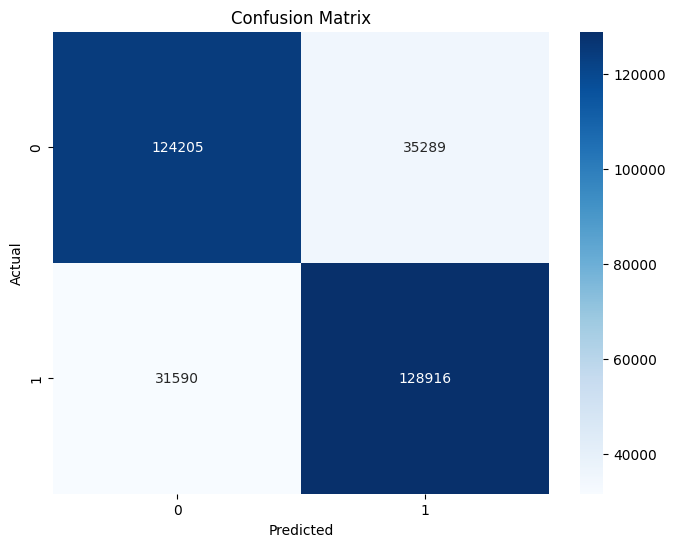

In [ ]:
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test_tfidf)

# Display accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Display classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix visualization
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


***MAKE PREDICTIONS FROM NEW INPUT***

In [ ]:
def predict_sentiment(text):
    cleaned = preprocess(text)
    vec = vectorizer.transform([cleaned])
    pred = model.predict(vec)
    return le.inverse_transform(pred)[0]


***CONVERT TO DATA FRAME AND ENCODE***

In [ ]:
# Function to make predictions from new input
def predict_sentiment(input_text):
    # Vectorize input text
    input_tfidf = tfidf.transform([input_text]).toarray()
    prediction = model.predict(input_tfidf)[0]
    # Instead of using an undefined 'encoder', directly interpret the prediction
    sentiment = "Positive" if prediction == 4 else "Negative"
    return sentiment

# Example: Predict sentiment of a new input
input_text = "I love this product, it's amazing!"
predicted_sentiment = predict_sentiment(input_text)
print(f"The predicted sentiment is: {predicted_sentiment}")

The predicted sentiment is: Positive


***PREDICT THE FINAL GRADE***

In [ ]:
predicted_sentiment = predict_sentiment("i love this project")
print("predicted sentiment:", predicted_sentiment)


predicted sentiment: Positive


In [ ]:
# Example: Predict the sentiment of a new input
input_text = "I hate waiting for things!"

predicted_sentiment = predict_sentiment(input_text)
print(f"The predicted sentiment is: {predicted_sentiment}")


The predicted sentiment is: Negative


***DEPLOYMENT BUILDING AN INTRACTIVE APP***

In [ ]:

# Now, we will build an interactive web app using **Gradio** to allow real-time emotion predictions from user input.

# Ensure Gradio is installed
!pip install gradio
# STEP 15: Deployment – Gradio App
import gradio as gr

def gradio_predict(text):
    vector = tfidf.transform([text]).toarray()
    scaled = scaler.transform(vector)
    pred = model.predict(scaled)
    return le.inverse_transform(pred)[0]

interface = gr.Interface(fn=gradio_predict,
                         inputs=gr.Textbox(lines=2, placeholder="Enter social media text..."),
                         outputs="text",
                         title="Social Media Sentiment Analyzer",
                         description="Predict the sentiment (Positive, Negative, Neutral) from social media conversation.")
interface.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://e916ea7f506635f8b1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


***CREATE A PREDICTION FUNCTION***

In [ ]:
# Create a function that will predict the sentiment of the input text
def predict_sentiment(input_text):
    # Preprocess input and make prediction using the trained model
    input_tfidf = tfidf.transform([input_text]).toarray()
    prediction = model.predict(input_tfidf)[0]
    sentiment = encoder.inverse_transform([prediction])
    return sentiment[0]


***CRATE THE GRADIO INTERFACE***

In [ ]:
import gradio as gr

# Define Gradio interface
interface = gr.Interface(
    fn=predict_sentiment,  # Prediction function
    inputs=gr.Textbox(lines=3, placeholder="Enter a social media comment..."),  # User input box
    outputs="text",  # Output (Predicted sentiment)
    title="Sentiment Classifier",  # Title of the app
    description="This application predicts the sentiment (Positive/Negative) of a given text based on sentiment analysis using a machine learning model."
)

# Launch the interactive web app
interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://182b436fdab8e166c9.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# 🔚👍 Conclusion:
- **Data Handling**: We have processed and cleaned the Sentiment140 dataset.
- **Modeling**: Built and trained a Logistic Regression model for sentiment classification.
- **Evaluation**: We evaluated the model using accuracy and classification reports.
- **Deployment**: Built an interactive Gradio app for real-time sentiment predictions.

## 🚀 Future Work:
- **Advanced Models**: Explore **BERT** or other transformer-based models for better performance.
- **Live Data Analysis**: Integrate the app with live social media data to analyze user posts in real-time.
